In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

In [3]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
crimes.shape

(185715, 12)

In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


#### Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

In [14]:
hour_crime = crimes['TIME OCC']
crimes['Hour OCC'] = hour_crime.str[:2].astype(int)
crimes['Hour OCC']

0         11
1         16
2         12
3          6
4          9
          ..
185710    11
185711    18
185712    10
185713    16
185714     9
Name: Hour OCC, Length: 185715, dtype: int32

In [15]:
peak_crime_hour = crimes['Hour OCC'].value_counts()
peak_crime_hour

Hour OCC
12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
0      8728
21     8701
22     8531
13     8474
10     8440
8      7523
23     7419
9      7092
1      5836
6      5621
7      5403
2      4726
3      3943
4      3238
5      3171
Name: count, dtype: int64

In [65]:
print(peak_crime_hour.index[0])

12


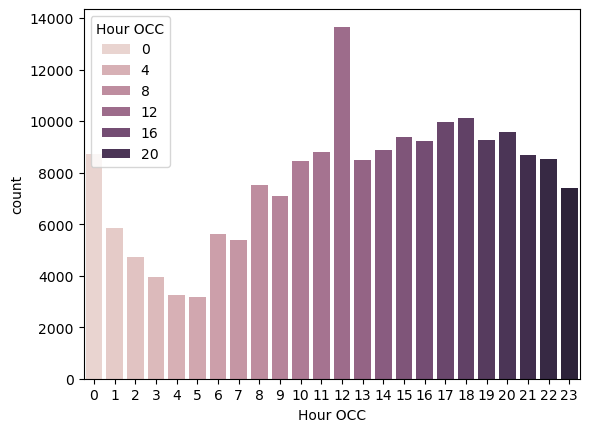

In [17]:
sns.countplot(data=crimes, x='Hour OCC', hue='Hour OCC')
plt.show()

#### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [18]:
crimes['Hour OCC'].unique()

array([11, 16, 12,  6,  9, 10, 13,  0, 17,  1, 21,  7, 15,  5, 18, 19, 23,
       14,  8, 20,  2, 22,  4,  3])

In [21]:
night_time = crimes[crimes["Hour OCC"].isin([22,23,0,1,2,3])]
night_time

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour OCC
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185687,231306158,2023-02-11,2023-02-08,2200,Newton,BURGLARY FROM VEHICLE,38,M,H,NaN,Invest Cont,1700 E 16TH ST,22
185695,231212224,2023-05-17,2023-05-17,2300,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST,23
185700,231300825,2023-06-07,2023-06-07,2203,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST,22
185701,230908346,2023-04-19,2023-04-18,2243,Van Nuys,THEFT OF IDENTITY,34,F,B,NaN,Invest Cont,4800 COLDWATER CANYON AV,22


In [46]:
peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["Hour OCC"].count().sort_values("Hour OCC", ascending=False).iloc[0]["AREA NAME"]
peak_night_crime_location


'Central'

#### Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [47]:
categories = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [49]:
crimes['Vict Age'].describe()

count    185715.000000
mean         39.999257
std          15.450227
min           2.000000
25%          28.000000
50%          37.000000
75%          50.000000
max          99.000000
Name: Vict Age, dtype: float64

In [64]:
crimes['age_bracket'] = pd.cut(crimes['Vict Age'], bins=[0, 17, 25, 34, 44, 54, 64, np.inf], labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"])
victim_ages = crimes['age_bracket'].value_counts()
print(victim_ages)


age_bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
